# Introduktion till datasetet Wine recognition data
### Bakgrund

Datasetet "Wine recognition data" består av resultat från kemisk analys av viner odlade i samma region i Italien men från tre olika druvsorter. Analysen visar mängderna av 13 beståndsdelar som finns i varje typ av vin.

### Dataattribut

Datasetet innehåller 13 kontinuerliga attribut som beskriver olika kemiska egenskaper hos vin:

1. **Alkohol**:
Mängden alkohol i vinet, uttryckt i procent volym. Alkoholinnehållet påverkar smaken, kroppen och den övergripande balansen i vinet.

2. **Äppelsyra (Malic Acid)**
En av de huvudsakliga syrorna som finns i vindruvor, påverkar vinets smakprofil och är viktig för den övergripande syrabalansen.

3. **Aska (Ash)**
Mäter den icke-organiska resten som återstår efter förbränning av vinet, vilket kan ge insikter om vinets mineralitet.

4. **Askalinitet (Alcalinity of Ash)**
Mäter askans buffertkapacitet, vilket påverkar vinets förmåga att motstå förändringar i pH och därmed dess stabilitet och färg.

5. **Magnesium**
En mineral som är viktig för tillväxten av vinrankan och påverkar också vinets smak och kvalitet.

6. **Totala fenoler (Total Phenols)**
Inkluderar alla fenolföreningar i vinet, som påverkar färg, smak och mognadspotential. Högre nivåer associeras ofta med högre kvalitet och antioxidativa egenskaper.

7. **Flavonoider (Flavanoids)**
En grupp av fenoler som är kända för sina antioxidativa egenskaper och som bidrar till vinets kropp och struktur. De är viktiga för färgstabiliteten i röda viner.

8. **Icke-flavonoida fenoler (Nonflavanoid Phenols)**
Dessa fenoler inkluderar ämnen som inte direkt påverkar färgen men bidrar till smak och lukt i vinet.

9. **Proantocyanidiner (Proanthocyanins)**
En klass av tanniner som ger vinet struktur och är viktiga för känslan i munnen. Dessa ämnen kan också påverka vinets åldrandepotential.

10. **Färgintensitet (Color Intensity)**
Mäter hur djup eller intensiv färgen är i vinet, vilket är särskilt relevant för röda viner.

11. **Nyans (Hue)**
Anger vinets färgnyans, vilket kan vara en indikation på ålder eller typ av vin.

12. **OD280/OD315 av utspädda viner**
Ett mått på vinets protein stabilitet, som ofta används för att mäta dess åldringspotential.

13. **Proline**
En aminosyra som finns i höga koncentrationer i vissa viner och som kan vara en markör för vinets kvalitet och ursprung.

### Klassfördelning och antal instanser

- Klass 1: 59 instanser
- Klass 2: 71 instanser
- Klass 3: 48 instanser

### Syfte
Beräkna deskriptiva mått, utföra hypotestest, beräkna konfidensintervall, samt utföra enkel linjär regression.

# Deskriptiv Statistik
### Beräkning av medelvärde och standardavvikelse

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm

data = pd.read_csv('data/wine.data', header=None)

# Definierar kolumnnamn på svenska
columns = [
    'Druvsort', 'Alkohol', 'Äppelsyra', 'Aska', 'Askalinitet', 'Magnesium',
    'Totala fenoler', 'Flavonoider', 'Icke-flavonoida fenoler', 'Proantocyanidiner',
    'Färgintensitet', 'Nyans', 'OD280/OD315 av utspädda viner', 'Proline'
]
data.columns = columns

# Beräknar medelvärde och standardavvikelse för alkoholhalten för varje druvsort
grouped_alco = data.groupby('Druvsort')['Alkohol'].agg(['mean', 'std'])
print(grouped_alco)

               mean       std
Druvsort                     
1         13.744746  0.462125
2         12.278732  0.537964
3         13.153750  0.530241


### Medelvärde (μ)
Medelvärdet är ett centralt mått som beskriver den genomsnittliga värdet av en datamängd. Det är summan av alla mätvärden dividerat med antalet mätvärden. Formeln för medelvärdet är:

$$
\mu = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

där:

- $x_i$ representerar varje enskild mätning i datamängden,
- $n$ är totala antalet mätvärden i datamängden.


### Standardavvikelse (σ)
Standardavvikelsen är ett mått på spridningen av mätvärdena i en datamängd. Det visar hur mycket mätvärdena avviker från medelvärdet. En hög standardavvikelse innebär att datavärdena är mer utspridda från medelvärdet. Formeln för standardavvikelsen är:

$$
\sigma = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \mu)^2}
$$

där:
- $x_i$ är varje mätvärde,
- $\mu$ är medelvärdet av mätvärdena,
- $n$ är antalet mätvärden.

### Distributionens form

För att bedöma om datamängden följer en specifik underliggande fördelning, såsom normalfördelningen, kan vi använda visuell inspektion av histogrammen. Histogrammen ger en första uppfattning om distributionen av alkoholhalten i varje druvsort. En visuell inspektion av dessa histogram kan indikera om datan är symmetriskt distribuerad (som kan tyda på en normalfördelning) eller om det finns skevhet eller andra oegentligheter som tyder på en annan fördelning.


### Data visualisering

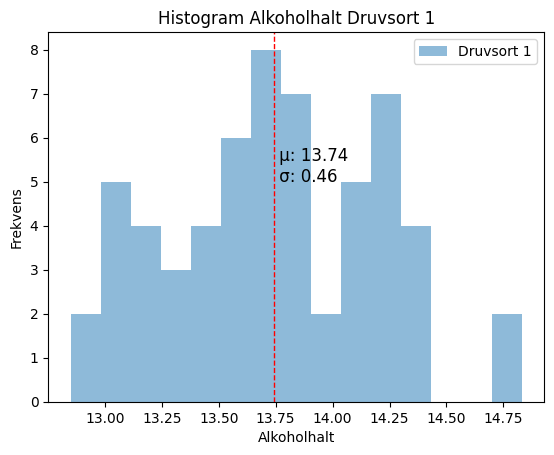

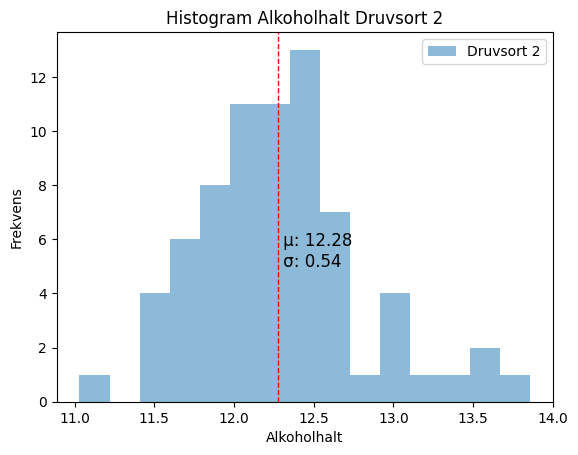

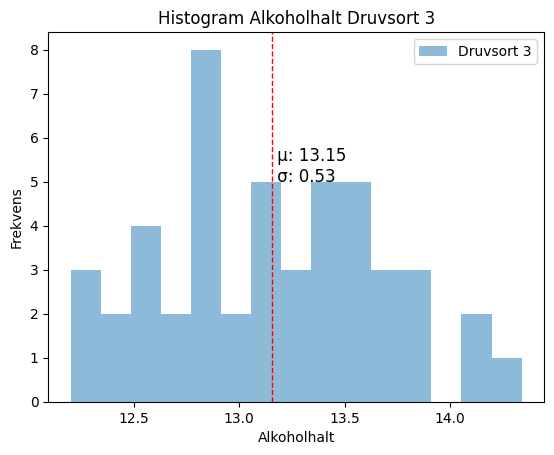

In [2]:
# Skapar ett histogram för varje druvsort
for Druvsort in data['Druvsort'].unique():
    subset = data[data['Druvsort'] == Druvsort]
    plt.hist(subset['Alkohol'], bins=15, alpha=0.5, label=f'Druvsort {Druvsort}')
    plt.axvline(subset['Alkohol'].mean(), color='r', linestyle='dashed', linewidth=1)
    plt.text(subset['Alkohol'].mean(), 5, f' μ: {subset["Alkohol"].mean():.2f}\n σ: {subset["Alkohol"].std():.2f}', fontsize=12)
    plt.title(f'Histogram Alkoholhalt Druvsort {Druvsort}')
    plt.xlabel('Alkoholhalt')
    plt.ylabel('Frekvens')
    plt.legend()
    plt.show()


### Fördelning av alkoholhalten i varje druvsort
Med endast 59, 71 respektive 48 instanser per klass (druvsort), kan det vara svårt att fastställa den verkliga underliggande fördelningen. Mindre prover tenderar att ha mer uttalad skevhet.

En av de starkaste anledningarna att anta normalfördelning är centrala gränsvärdessatsen, som säger att medelvärdet av ett tillräckligt stort antal oberoende och likadant fördelade stokastiska variabler med begränsad varians kommer att vara approximativt normalfördelade, oavsett den underliggande fördelningen. Om varje mätning av kemiska egenskaper, såsom alkoholhalten, är ett resultat av många små oberoende faktorer, kan deras summa tendera att närma sig en normalfördelning.

# Hypotestest och konfidensintervall
### Formel för t-test

För att utföra ett vänstersidigt t-test för ett stickprov använder vi följande ekvation för att beräkna t-värdet:

$$
t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}}
$$

där:
- $\bar{x}$ är stickprovets medelvärde,
- $\mu_0$ är det hypotetiska medelvärdet under nollhypotesen (1.75 i detta fall),
- $s$ är stickprovets standardavvikelse,
- $n$ är storleken på stickprovet (15 i detta fall).

### Hypoteser

- **Nollhypotes ($H_0$):** $\mu \geq 1.75$
- **Alternativ hypotes ($H_1$):** $\mu < 1.75$

### Beslutsregel

Vi förkastar nollhypotesen om t-värdet är mindre än det kritiska värdet från t-fördelningen för $n-1$ frihetsgrader vid en signifikansnivå av $\alpha = 0.05$. Vi jämför p-värdet med $\alpha$ för att avgöra om nollhypotesen ska förkastas.

### Formel för beräkning av p-värde

Efter att t-värdet är beräknat, används t-fördelningen för att bestämma p-värdet. För ett vänstersidigt test används följande ekvation:

$$
p\text{-värde} = P(T \leq t)
$$

där:
- $T$ är en t-fördelad slumpvariabel med $n-1$ frihetsgrader,
- $t$ är det beräknade t-värdet från t-testet,
- $n-1$ är antalet frihetsgrader, vilket beräknas som $n - 1$, där $n$ är storleken på stickprovet.

Denna formel använder den kumulativa fördelningsfunktionen (CDF) för t-fördelningen för att hitta sannolikheten att få ett resultat lika extremt eller mer extremt än det observerade t-värdet under förutsättning att nollhypotesen är sann.


In [3]:
# Filtrerar ut data för druvsort 2
data_druvsort2 = data[data['Druvsort'] == 2]

# Väljer ett slumpmässigt stickprov på 15 värden från druvsort 2
sample = data_druvsort2['Proantocyanidiner'].sample(n=15, random_state=2023)

# Utför ett ensidigt t-test med nollhypotesen att medelvärdet är 1.75
t_stat, p_value_twosided = ttest_1samp(sample, 1.75)

# Eftersom vi utför ett vänstersidigt test
p_value_onesided = p_value_twosided / 2 if t_stat < 0 else 1 - (p_value_twosided / 2)

print(f"t-statistik: {t_stat}")
print(f"p-värde (ensidigt): {p_value_onesided}")

t-statistik: -1.7988753571133511
p-värde (ensidigt): 0.04681272930151229


In [4]:
# Beräknar medelvärdet och standardavvikelsen för stickprovet
sample_mean = sample.mean()
sample_std = sample.std()
sample_size = len(sample)

# Skriver ut resultaten och stickprovets statistik
print("Stickprovets medelvärde:", sample_mean)
print("Stickprovets standardavvikelse:", sample_std)
print("Storlek på stickprovet:", sample_size)

Stickprovets medelvärde: 1.4906666666666664
Stickprovets standardavvikelse: 0.5583453445758494
Storlek på stickprovet: 15


### Beräkning av t-statistik

Insättning av de observerade värdena i formeln ger:

$$
t = \frac{1.4907 - 1.75}{0.5583 / \sqrt{15}} \approx -1.8
$$

Detta värde används för att bedöma om skillnaden mellan stickprovets medelvärde och det hypotetiska medelvärdet är statistiskt signifikant.

### Resultat från testet
- **t-statistik:** -1.7988753571133511
- **p-värde:** 0.04681272930151229

### Tolkning 
**Tolkning av t-statistik:**

T-statistiken är -1.7988753571133511, vilket indikerar att stickprovets medelvärde ligger under det hypotetiska medelvärdet på 1.75 (som anges av nollhypotesen). Eftersom t-värdet är negativt, bekräftar detta att medelvärdet i stickprovet är mindre än 1.75, vilket är i linje med vad alternativ hypotes föreslår.

**Tolkning av p-värde:**

P-värdet är 0.04681272930151229. Detta värde är ett ensidigt p-värde eftersom vi testar ett specifikt riktat alternativ (att medelvärdet är mindre än 1.75). Ett p-värde under 0.05 (signifikansnivån) innebär att det finns statistiskt signifikanta bevis för att förkasta nollhypotesen till förmån för alternativhypotesen vid 95% konfidensnivå.

### Slutsats
Med ett p-värde på 0.0468, som är mindre än signifikansnivån på 0.05, kan vi förkasta nollhypotesen μ≥1.75. Detta innebär att det finns statistiskt signifikanta bevis för att medelvärdet av proantocyanidiner i denna druvsort är mindre än 1.75. Alltså tillräcklig evidens för att stödja påståendet att mängden proantocyanidiner i druvsort 2 är lägre än det angivna tröskelvärdet.

# Skillnaden i fenolhalt mellan två druvsorter

In [5]:
# Väljer två stickprover för druvsort 2 och 3 med random_state för reproducerbarhet
sample2 = data[data['Druvsort'] == 2]['Totala fenoler'].sample(n=20, random_state=2023)
sample3 = data[data['Druvsort'] == 3]['Totala fenoler'].sample(n=20, random_state=2023)

# Utför t-testet för oberoende stickprov med antagande om olik varians (Welch's t-test)
t_stat, p_value = stats.ttest_ind(sample2, sample3, equal_var=False)

# Beräknar medelvärdena och standardavvikelserna för varje stickprov
mean2 = np.mean(sample2)
mean3 = np.mean(sample3)
std2 = np.std(sample2, ddof=1)
std3 = np.std(sample3, ddof=1)

# Beräknar standardfel för skillnaden i medelvärden
se_diff = np.sqrt((std2**2 / len(sample2)) + (std3**2 / len(sample3)))

# Beräknar frihetsgrader för Welch's t-test
df = ((std2**2 / len(sample2) + std3**2 / len(sample3))**2 /
      ((std2**2 / len(sample2))**2 / (len(sample2) - 1) +
       (std3**2 / len(sample3))**2 / (len(sample3) - 1)))

# Konfidensintervall
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha/2, df)  # Tvåsidigt kritiskt t-värde
margin_error = t_critical * se_diff
ci_lower = (mean2 - mean3) - margin_error
ci_upper = (mean2 - mean3) + margin_error
print(f"95% konfidensintervall för skillnaden i fenolhalt mellan druvsort 2 och 3 är: ({ci_lower}, {ci_upper})")

95% konfidensintervall för skillnaden i fenolhalt mellan druvsort 2 och 3 är: (0.2646082491757186, 0.8343917508242815)


### Analys av konfidensintervallet
Ett 95% konfidensintervall för skillnaden i fenolhalt mellan de två druvsorterna är (0.2646082491757186, 0.8343917508242815). Detta konfidensintervall indikerar att skillnaden i medelvärdet av fenolhalter mellan druvsort 2 och druvsort 3 med 95% säkerhet ligger mellan dessa två värden.

### Beskrivning av konfidensintervallets matematiska delar
Konfidensintervallet baseras på Welch's approximation för oberoende t-test med olik varians. Det är beräknat som:

$$
(\bar{x}_2 - \bar{x}_3) \pm t^* \sqrt{\frac{s_2^2}{n_2} + \frac{s_3^2}{n_3}}
$$

där:
- $\bar{x}_2$ och $\bar{x}_3$ är stickprovets medelvärden för druvsort 2 respektive druvsort 3.
- $s_2^2$ och $s_3^2$ är stickprovets varianser.
- $n_2$ och $n_3$ är storlekarna på stickproven.
- $t^*$ är det kritiska värdet från t-fördelningen för den önskade konfidensnivån, vilket här är 0.975 (tvåsidigt) för ett 95% konfidensintervall.

Frihetsgraderna för Welch's t-test beräknas med Welch-Satterthwaite-ekvationen:

$$
df = \frac{\left(\frac{s_2^2}{n_2} + \frac{s_3^2}{n_3}\right)^2}{\frac{\left(\frac{s_2^2}{n_2}\right)^2}{n_2 - 1} + \frac{\left(\frac{s_3^2}{n_3}\right)^2}{n_3 - 1}}
$$

### Påverkan av ändringar i stickprovsstorlek och konfidensgrad

**Förändrad stickprovsstorlek:**
- **Ökning** av stickprovsstorlek resulterar i en minskning av standardfelet (den del av formeln under kvadratroten), vilket leder till ett smalare konfidensintervall. Detta ger mer exakta uppskattningar av skillnaden i fenolhalt.
- **Minskning** av stickprovsstorlek resulterar i motsatsen – ett bredare konfidensintervall, vilket indikerar en mindre exakt uppskattning.

**Förändrad konfidensgrad:**
- **Högre** konfidensgrad (ex. 99% istället för 95%) innebär ett bredare konfidensintervall eftersom det kritiska värdet $t^*$ från t-fördelningen ökar för att inkludera en större del av sannolikhetsmassan.
- **Lägre** konfidensgrad (ex. 90% istället för 95%) leder till ett smalare konfidensintervall då det kritiska värdet $t^*$ minskar.

### Stödjer konfidensintervallet påståendet att det inte är någon skillnad i fenolhalt mellan de två druvsorterna?

Konfidensintervallet (0.2646082491757186, 0.8343917508242815) inkluderar inte noll. Detta innebär att det inte stödjer påståendet att det inte finns någon signifikant skillnad i fenolhalt mellan de två druvsorterna. Med andra ord, vi kan vara 95% säkra på att det finns en positiv skillnad i fenolhalt mellan druvsort 2 och druvsort 3, med druvsort 2 som har en statistiskt högre fenolhalt än druvsort 3. Detta resultat indikerar att det finns en verklig skillnad mellan grupperna som är statistiskt signifikant.


# Hypotestest för andelen prover me ask-alkalinitet över 20 mellan två druvsorter

För att undersöka om det finns en skillnad i andelen prover med ask-alkalinitet över 20 mellan två druvsorter, utför vi ett hypotestest med följande steg och beräkningar.

### Hypoteser
- **Nollhypotes ($H_0$)**: Det finns ingen skillnad i andelen prover med ask-alkalinitet över 20 mellan de två druvsorterna. $ \hat{p}_2 = \hat{p}_3 $
- **Alternativhypotes ($H_1$)**: Det finns en skillnad i andelen prover med ask-alkalinitet över 20 mellan de två druvsorterna. $ \hat{p}_2 \neq \hat{p}_3 $

### Matematiska beräkningar

Andelen för varje grupp beräknas som:
$$
\hat{p} = \frac{x}{n}
$$
där $x$ är antalet observationer som uppfyller kriteriet och $n$ är totala antalet observationer i stickprovet.

För z-testet för två proportioner, beräknas teststatistiken $Z$ enligt:
$$
Z = \frac{\hat{p}_2 - \hat{p}_3}{\sqrt{\hat{p}(1 - \hat{p})(\frac{1}{n_2} + \frac{1}{n_3})}}
$$
där $\hat{p}$ är den kombinerade andelen, beräknad som:
$$
\hat{p} = \frac{x_2 + x_3}{n_2 + n_3}
$$
och $n_2$ och $n_3$ är storlekarna på de två stickproverna.

In [6]:
sample2 = data[data['Druvsort'] == 2].sample(n=25, random_state=2023)
sample3 = data[data['Druvsort'] == 3].sample(n=25, random_state=2023)

# Beräknar antal med ask-alkalinitet över 20
count2 = np.sum(sample2['Askalinitet'] > 20)
count3 = np.sum(sample3['Askalinitet'] > 20)

# Beräknar andelar
p2 = count2 / 25
p3 = count3 / 25

# Kombinerad andel
p_combined = (count2 + count3) / (25 + 25)

# Beräknar z-statistik
z_stat = (p2 - p3) / np.sqrt(p_combined * (1 - p_combined) * (1/25 + 1/25))
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))  # Two-tailed test

print("z-statistik:", z_stat)
print("p-värde:", p_value)

z-statistik: -2.0057388927143847
p-värde: 0.0448841133456368


### Förklaring av teststatistiken och p-värdet

**Z-statistik**: -2.0057388927143847

Z-statistiken är ett mått på hur många standardavvikelser ditt observerade värde (skillnaden i andelar mellan de två grupperna) är från det nollhypotesens förväntade värde (ingen skillnad mellan grupperna). I detta fall är z-värdet -2.0057, vilket indikerar att skillnaden i andelar är ungefär två standardavvikelser mindre än vad som förväntas om det inte fanns någon skillnad alls. Eftersom z-värdet är negativt, tyder detta på att druvsort 2 kan ha en lägre andel av prov med ask-alkalinitet över 20 jämfört med druvsort 3.

**P-värde**: 0.0448841133456368

P-värdet är ett mått på sannolikheten för att observera en statistik minst lika extrem som den faktiska observerade, under förutsättning att nollhypotesen är sann. Ett p-värde på ungefär 0.0449 innebär att det finns ungefär 4.5% chans att få en z-statistik som är lika extrem eller mer extrem än -2.0057, om det verkligen inte finns någon skillnad i andelen prover med ask-alkalinitet över 20 mellan de två druvsorterna.

**Tolkning:**
Eftersom p-värdet (0.0449) är mindre än den vanliga signifikansnivån på 0.05, kan vi förkasta nollhypotesen om att det inte finns någon skillnad i andelen prover med ask-alkalinitet över 20 mellan de två druvsorterna. Detta innebär att vi har statistiskt signifikanta bevis för att det finns en skillnad mellan de två druvsorterna när det gäller andelen prover med ask-alkalinitet över 20.

# Visualiserar korrelationsmatrisen för alla 13 parametrar

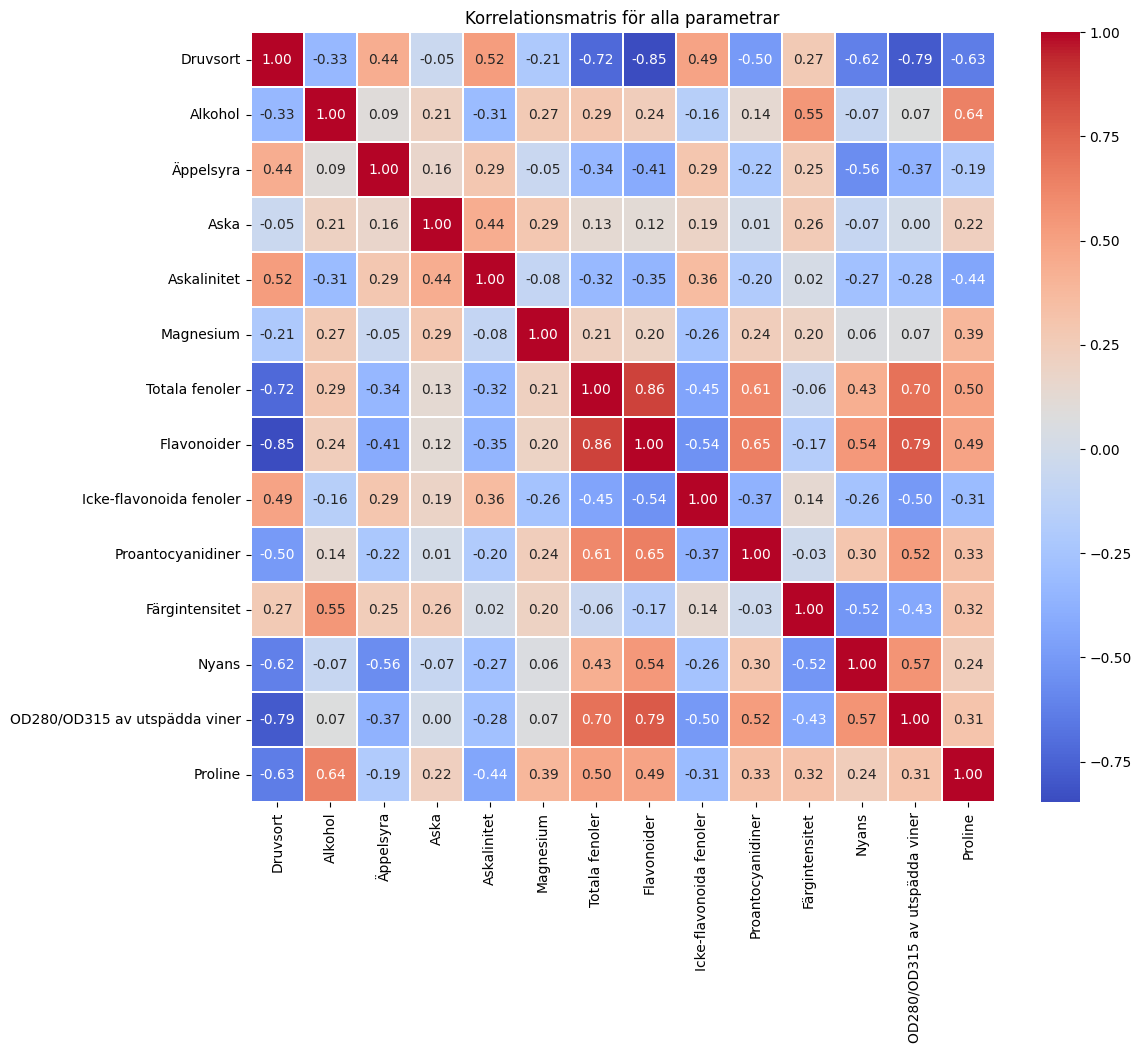

In [7]:
# Beräknar korrelationsmatrisen
correlation_matrix = data.corr()

# Plottar korrelationsmatrisen
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Korrelationsmatris för alla parametrar')
plt.show()

### Pearson’s Korrelationskoefficient
Pearson's Korrelationskoefficient $r$:

Pearson’s korrelationskoefficient är ett mått på linjär korrelation mellan två variabler X och 𝑌. Den är ett värde mellan -1 och +1 där:

- **+1** innebär perfekt positiv linjär korrelation,
- **-1** innebär perfekt negativ linjär korrelation,
- **0** innebär ingen linjär korrelation.
Matematiskt beräknas den som:

Pearson's korrelationskoefficient $r$ beräknas med följande formel:

$$
r = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum (X_i - \bar{X})^2 \sum (Y_i - \bar{Y})^2}}
$$

där:
- $X_i$ och $Y_i$ är värdena på variablerna,
- $\bar{X}$ och $\bar{Y}$ är medelvärdena för dessa variabler.


In [8]:
# Väljer oberoende variabel (X) och beroende variabel (Y)
X = data['Totala fenoler']
Y = data['Flavonoider']

# Lägger till en konstant till X
X = sm.add_constant(X)

# Bygger och passar modellen
model = sm.OLS(Y, X).fit()

# Visar resultatet
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Flavonoider   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     520.9
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           1.76e-54
Time:                        10:19:51   Log-Likelihood:                -129.38
No. Observations:                 178   AIC:                             262.8
Df Residuals:                     176   BIC:                             269.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.1376      0.144     -7.

### Diskussion av modellens resultat

1. **Korrelation och förklaringsvärde (r-squared):**
   - **R-squared-värdet är 0.747**, vilket indikerar att ungefär 74.7% av variationen i flavonoidhalt kan förklaras av variationen i totala fenoler i datasetet. Detta är ett högt värde, vilket tyder på en stark linjär relation mellan dessa två variabler.
   - **Adjusted R-squared är 0.746**, nästan identiskt med R-squared, vilket stärker indikationen att modellen förklarar data väl utan att överanpassa.

2. **Signifikans av regression (f-statistic och dess p-värde):**
   - **F-statistiken är 520.9** med ett extremt lågt p-värde (**1.76e-54**). Detta innebär att det finns mycket starka bevis för att modellen är statistiskt signifikant bättre än en enkel medelmodell, dvs. det finns en mycket låg sannolikhet att så höga F-värden skulle observeras om det inte fanns något samband alls mellan de två variablerna.

3. **Signifikans av koefficienter:**
   - Koefficienten för "Totala fenoler" är **1.3798** med ett standardfel på **0.060**, och t-värdet för denna koefficient är **22.824** med ett p-värde nära noll. Detta tyder på att för varje enhet ökning i totala fenoler ökar flavonoidhalten med ungefär 1.38 enheter, och denna effekt är mycket signifikant.
   - Konstanten (intercept) är **-1.1376**, vilket också är statistiskt signifikant.

### Är de utvalda parametrarna lämpliga för prediktion?

- **Ja**, de utvalda parametrarna "Totala fenoler" och "Flavonoider" är mycket lämpliga för prediktion baserat på den höga korrelationen, det starka förklaringsvärdet och den statistiska signifikansen av regressionen.
- Det starka sambandet och de höga t-värdena för koefficienterna indikerar att modellen inte bara fångar en stark relation utan också kan vara tillförlitlig för prediktiva syften inom samma kontext som data samlades.

### Sammanfattning

Modellen är robust och visar starka tecken på både god passform och hög prediktiv förmåga. Det är viktigt att notera de eventuella problemen med normalfördelningen av residualer, vilket kan behöva ytterligare undersökning eller anpassning av modellen, eventuellt genom transformationer eller robustare regressionsmetoder.


# Extra: jämförelse av olika ML-modeller för att förutsäga vinets klass baserat på de kemiska egenskaperna.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

data.columns = columns

# Delar upp data i features och target
X = data.drop('Druvsort', axis=1)
y = data['Druvsort']

# Delar upp data i tränings- och testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Normaliserar features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Skapar modellinstanser
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Naive Bayes': GaussianNB(),
    'Stacking': StackingClassifier(estimators=[
        ('rf', RandomForestClassifier()),
        ('gb', GradientBoostingClassifier()),
        ('svm', SVC(probability=True))
    ], final_estimator=LogisticRegression())
}

# Tränar och utvärderar varje modell
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    results[name] = {'Accuracy': accuracy, 'Precision': precision}

# Visa resultaten
for name, metrics in results.items():
    print(f"{name} - Accuracy: {metrics['Accuracy']:.2f}, Precision: {metrics['Precision']:.2f}")


Logistic Regression - Accuracy: 0.98, Precision: 0.98
KNN - Accuracy: 0.96, Precision: 0.96
Decision Tree - Accuracy: 0.93, Precision: 0.94
Random Forest - Accuracy: 1.00, Precision: 1.00
SVM - Accuracy: 0.98, Precision: 0.98
Gradient Boosting - Accuracy: 0.96, Precision: 0.96
AdaBoost - Accuracy: 0.91, Precision: 0.92
Naive Bayes - Accuracy: 1.00, Precision: 1.00
Stacking - Accuracy: 1.00, Precision: 1.00
